In [135]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [136]:
import pandas as pd

path = "data/data.xlsx"
df = pd.read_excel(path)
df = pd.DataFrame(df)
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [137]:
df.shape

(7043, 33)

In [138]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [139]:
""" 
Notice : Total Charges column has a object data type but it is numerical data , 
dp let's change data type for this column 

"""
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [140]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.771362,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,401.450000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3794.737500,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


In [141]:
from typing import Iterable, List
def calculate_null_percentage(column: Iterable) -> float:
    """
    Compute the percentage of null values in a dataframe column.
    
    Args:
    column (Iterable): A column from a dataframe
    
    Returns:
    float: The percentage of null values in the column
    """
    total_count = sum(1 for _ in column)
    null_count = sum(1 for value in column if pd.isna(value))
    return (null_count / total_count) * 100 if total_count > 0 else 0

# Now we have calculate_null_percentage(column) as a higher-order function
# We can use it in any dataframe column
# Leveraging the higher-order function principle
# We can use it in any dataframe column
# Type hints have been added to it
percentage_list: List[float] = df.apply(lambda x: calculate_null_percentage(x), axis=0)
percentage_list


CustomerID            0.000000
Count                 0.000000
Country               0.000000
State                 0.000000
City                  0.000000
Zip Code              0.000000
Lat Long              0.000000
Latitude              0.000000
Longitude             0.000000
Gender                0.000000
Senior Citizen        0.000000
Partner               0.000000
Dependents            0.000000
Tenure Months         0.000000
Phone Service         0.000000
Multiple Lines        0.000000
Internet Service      0.000000
Online Security       0.000000
Online Backup         0.000000
Device Protection     0.000000
Tech Support          0.000000
Streaming TV          0.000000
Streaming Movies      0.000000
Contract              0.000000
Paperless Billing     0.000000
Payment Method        0.000000
Monthly Charges       0.000000
Total Charges         0.156183
Churn Label           0.000000
Churn Value           0.000000
Churn Score           0.000000
CLTV                  0.000000
Churn Re

In [142]:
""" 
we can see that 73% of in the "Churn Reason" column is missing "NULL" 
so what is the best way to fill the missing values?
Handling a feature with a high percentage of missing values, such as the “Churn Reason” column with approximately 73% nulls, requires a thoughtful approach to ensure that the integrity and predictive power of your dataset are maintained. Below is a comprehensive process to address this situation:

1. Understand the Nature of the Missing Data
Before deciding how to handle the missing values, it's crucial to understand why the data is missing. This involves:

Q- so i think we can drop the column


"""

df=df.drop(columns=['Churn Reason'])

In [143]:
""" 
we have 15% in the 'Total ' column is missing values "NULL" 
so we need to handle them but what is the best method to do this ? 

"""
# Impute missing 'Total Charges' by multiplying 'Monthly Charges' with 'Tenure Months'
df['Total Charges'] = df['Total Charges'].fillna(df['Monthly Charges'] * df['Tenure Months'])

In [144]:
""" 
just to check 
"""
df.shape

(7043, 32)

In [145]:
df.isnull().sum()

CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
dtype: int64

In [146]:
import pandas as pd
from typing import List, Tuple

def calculate_cardinality(df: pd.DataFrame) -> pd.Series:
    """
    Calculate the number of unique values for each column in the DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.Series: A Series with column names as index and unique value counts as values.
    """
    return df.nunique()

def find_constant_columns(cardinality: pd.Series) -> List[str]:
    """
    Identify columns with constant values (only one unique value).

    Parameters:
    cardinality (pd.Series): A Series with unique value counts for each column.

    Returns:
    List[str]: A list of column names that are constant.
    """
    return cardinality[cardinality == 1].index.tolist()
def find_high_cardinality_columns(cardinality: pd.Series, total_rows: int, threshold: float = 0.5) -> List[str]:
    """
    Identify columns with high cardinality based on a threshold.

    Parameters:
    cardinality (pd.Series): A Series with unique value counts for each column.
    total_rows (int): Total number of rows in the DataFrame.
    threshold (float): The fraction of unique values relative to the number of rows.
                       Columns with unique value counts >= (threshold * total_rows) will be considered high cardinality.

    Returns:
    List[str]: A list of column names that have high cardinality.
    """
    return cardinality[cardinality / total_rows >= threshold].index.tolist()

def classify_columns_by_cardinality(df: pd.DataFrame, high_cardinality_threshold: float = 0.5) -> Tuple[List[str], List[str]]:
    """
    Classify columns into low and high cardinality based on their unique value counts.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    high_cardinality_threshold (float): The fraction of unique values to consider a column as high cardinality.

    Returns:
    Tuple[List[str], List[str]]: A tuple containing two lists:
                                 - List of constant (low cardinality) columns.
                                 - List of high cardinality columns.
    """
    cardinality = calculate_cardinality(df)
    low_cardinality = find_constant_columns(cardinality)
    total_rows = df.shape[0]
    high_cardinality = find_high_cardinality_columns(cardinality, total_rows, high_cardinality_threshold)
    return low_cardinality, high_cardinality


In [147]:
# Calculate cardinality and classify columns
low_cardinality, high_cardinality = classify_columns_by_cardinality(df)

# Print results
print("Constant (Low Cardinality) Columns:")
print(low_cardinality)
print("\nHigh Cardinality Columns:")
print(high_cardinality)

# Optionally, you can create new DataFrames with the classified columns
df_low_cardinality = df[low_cardinality]
df_high_cardinality = df[high_cardinality]

# You can also calculate the percentage of columns in each category
total_columns = len(df.columns)
low_cardinality_percentage = len(low_cardinality) / total_columns * 100
high_cardinality_percentage = len(high_cardinality) / total_columns * 100

print(f"\nPercentage of Constant Columns: {low_cardinality_percentage:.2f}%")
print(f"Percentage of High Cardinality Columns: {high_cardinality_percentage:.2f}%")


Constant (Low Cardinality) Columns:
['Count', 'Country', 'State']

High Cardinality Columns:
['CustomerID', 'Total Charges']

Percentage of Constant Columns: 9.38%
Percentage of High Cardinality Columns: 6.25%


In [148]:
""" 
Handling Low and High Cardinality Columns
Low Cardinality (Including Constant Columns)
Issues:

Constant Columns: Provide no variance, offering no predictive power. They can introduce unnecessary computational overhead.
Low but Variable Cardinality: Columns with a small number of unique values (e.g., Gender, Marital Status) are not inherently problematic but may require specific encoding.
"""
df = df.drop(columns=low_cardinality )

In [149]:
from typing import List, Tuple

def classify_columns(df: pd.DataFrame) -> Tuple[List[str], List[str]]:
    """
    Classifies columns of a DataFrame into numerical and categorical.

    Args:
        df (pd.DataFrame): Input DataFrame

    Returns:
        Tuple[List[str], List[str]]: A tuple containing two lists:
            - List of numerical column names
            - List of categorical column names
    """
    is_numeric = lambda col: pd.api.types.is_numeric_dtype(df[col])
    
    numerical_columns = list(filter(is_numeric, df.columns))
    categorical_columns = list(filter(lambda col: not is_numeric(col), df.columns))
    
    return numerical_columns, categorical_columns

""" 
now given  this function : 
we use the high level order feature of it 
and the lamabda function to make it more readable
make a call to it 
"""
numerical_columns, categorical_columns = classify_columns(df)
(numerical_columns, categorical_columns)

(['Zip Code',
  'Latitude',
  'Longitude',
  'Tenure Months',
  'Monthly Charges',
  'Total Charges',
  'Churn Value',
  'Churn Score',
  'CLTV'],
 ['CustomerID',
  'City',
  'Lat Long',
  'Gender',
  'Senior Citizen',
  'Partner',
  'Dependents',
  'Phone Service',
  'Multiple Lines',
  'Internet Service',
  'Online Security',
  'Online Backup',
  'Device Protection',
  'Tech Support',
  'Streaming TV',
  'Streaming Movies',
  'Contract',
  'Paperless Billing',
  'Payment Method',
  'Churn Label'])

In [150]:
""" 
now get the length of 
1-numerical features
2-categorical features
""" 
(len(numerical_columns), len(categorical_columns))

(9, 20)

C:\Users\PCS\AppData\Local\Temp\ipykernel_29460\1736990572.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=target, shade=True)


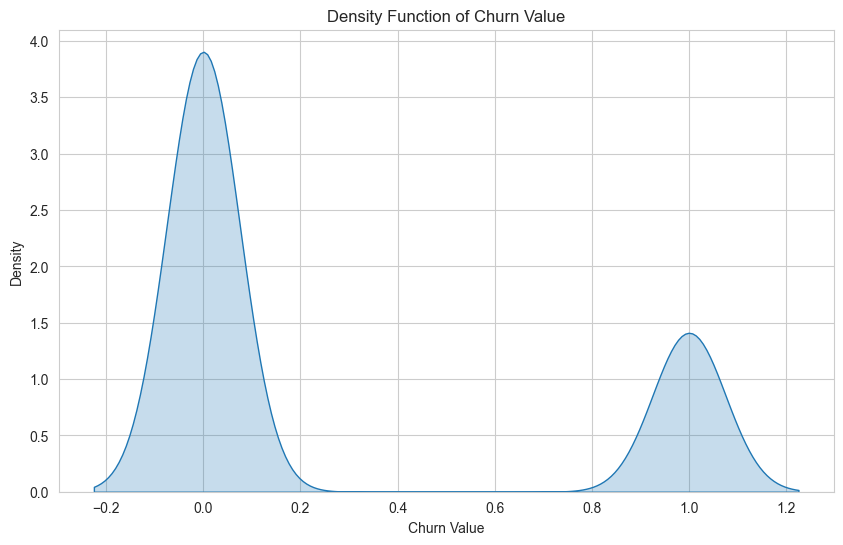

In [151]:
"""
oky as we see we have 
10- numerical features
23- categorical features
and the problem is a supervised learning problem 
where the "y" is $"Churn Value"
Q- what about to lear about some statique properties of this target 

"""
""" 
Q- firt idea that come to my mind to plot the density fuction of the target
--> create a python target feature and plot it density function
"""

# Create a target feature
target = df['Churn Value']

# Plot the density function of the target
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(data=target, shade=True)
plt.title('Density Function of Churn Value')
plt.xlabel('Churn Value')
plt.ylabel('Density')
plt.show()


In [152]:
"""
oky as we see we have 
9- numerical features
24- categorical features
and the problem is a supervised learning problem 
where the "y" is $"Churn Value"
Q- what about to lear about some statique properties of this target 

"""

""" 
Cumulative Distribution Function (CDF):
A CDF would show the proportion of customers below any given churn value. This graph would:


Clearly illustrate the percentiles of churn risk
Help identify thresholds for categorizing customers (e.g., low, medium, high risk)
Reveal the exact proportion of customers in each peak


"""
# Create a target feature
target = df['Churn Value']
# Print some statistics
print(f"Mean Churn Value: {np.mean(target)}")
print(f"Median Churn Value: {np.median(target)}")
print(f"25th Percentile: {np.percentile(target, 25)}")
print(f"75th Percentile: {np.percentile(target, 75)}")

Mean Churn Value: 0.2653698707936959
Median Churn Value: 0.0
25th Percentile: 0.0
75th Percentile: 1.0


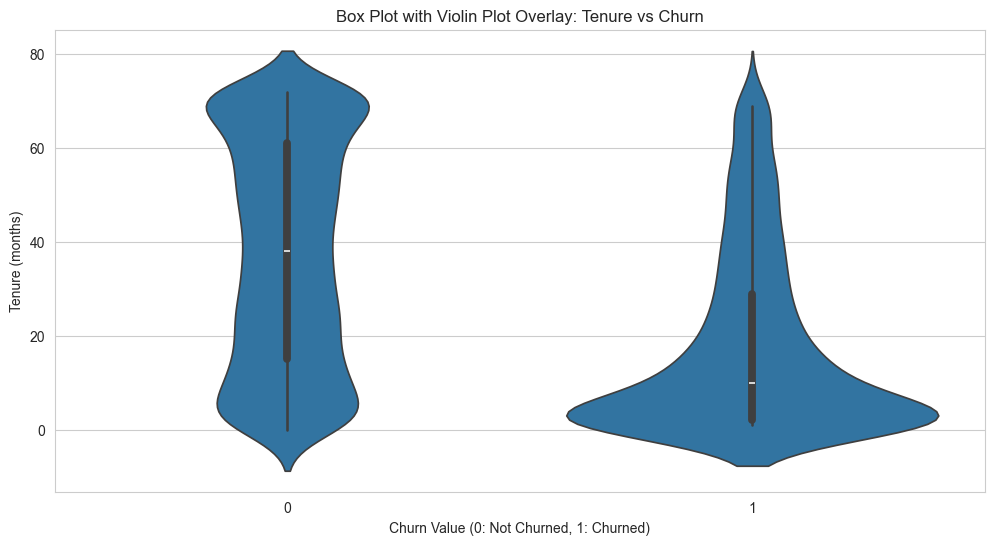

In [153]:

# Assuming you have your data in a DataFrame called 'df'
# with columns 'Churn Value' and other variables like 'tenure', 'MonthlyCharges', etc.

# Set the style for the plot
sns.set_style("whitegrid")

# Create the figure and axes
plt.figure(figsize=(12, 6))

# Create the box plot with violin plot overlay
sns.violinplot(x='Churn Value', y=df["Tenure Months"], data=df, inner='box')

# Customize the plot
plt.title('Box Plot with Violin Plot Overlay: Tenure vs Churn')
plt.xlabel('Churn Value (0: Not Churned, 1: Churned)')
plt.ylabel('Tenure (months)')

# Show the plot
plt.show()

# You can repeat this for other variables by changing 'tenure' to 'MonthlyCharges', etc.


# EDA

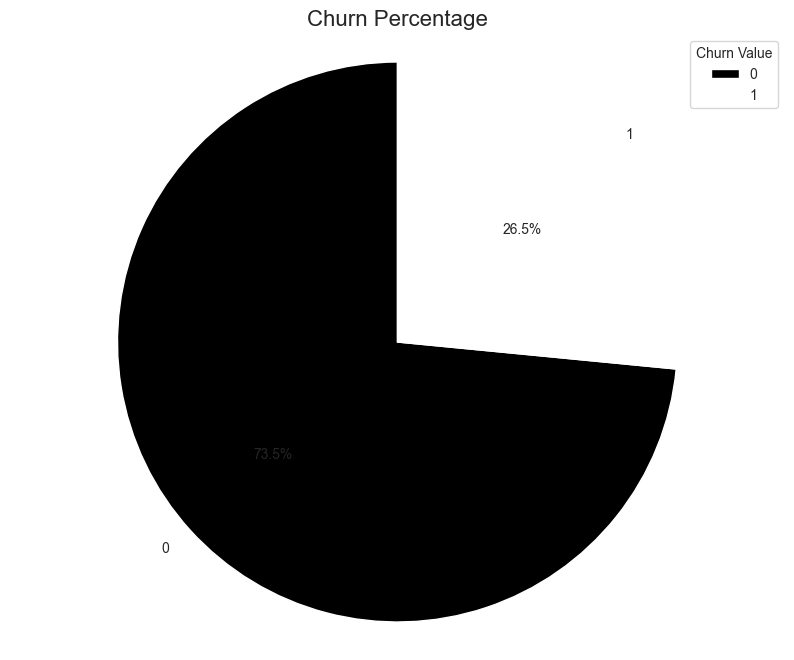

In [154]:
""" 
Q- because “Pie-Chart” is a beautiful chart to see the percentage of 

Churn “Churn Value” in our dataset : so can you give how to implement it as beautiful one 

→ the title is Churn Percanatge 
→ Pie Chat : is the style 
→ the two colors are “Black” , “White” 


Q- give the full code to do this 


"""
# Assuming you have a DataFrame called 'df' with a 'Churn Value' column
churn_counts = df['Churn Value'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['black', 'white'])
plt.title('Churn Percentage', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a legend
plt.legend(title='Churn Value', loc='best')

# Show the plot
plt.show()


26.5% of customers have stopped using our service, Our task is to know which type of customers are more likely to stop using our service and what actions we can take.

# Feature Engineering

In [155]:
"""
First let's try to deal with the encoding of categorical variables.
Q- why On-Hot Encoding?
because after callsifying the categorical variables, numerical values 
and also classify them in low & hight cardinaality.
we can use the One-Hot Encoding to encode the categorical variables.

Idea: Encode categorical variables into numerical representations.

One-Hot Encoding: Suitable for nominal categories with limited unique values.

Q- levraging all the previous code try to levrage the principle of "DRY" and use them 
- first to select the varibles with the right cardinality. in the categorical variables.
- second apply the One-Hot Encoding to the categorical variables.

"""

def select_categorical_for_encoding(df: pd.DataFrame, high_cardinality_threshold: float = 0.5) -> List[str]:
    _, categorical_columns = classify_columns(df)
    cardinality = calculate_cardinality(df[categorical_columns])
    total_rows = df.shape[0]
    high_cardinality = find_high_cardinality_columns(cardinality, total_rows, high_cardinality_threshold)
    return [col for col in categorical_columns if col not in high_cardinality]

def one_hot_encode(df: pd.DataFrame, columns_to_encode: List[str]) -> pd.DataFrame:
    return pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# Select categorical variables for encoding
columns_to_encode = select_categorical_for_encoding(df)

# Apply One-Hot Encoding
df_encoded = one_hot_encode(df, columns_to_encode)

# Print information about the encoding
print(f"Original DataFrame shape: {df.shape}")
print(f"Encoded DataFrame shape: {df_encoded.shape}")
print(f"\nColumns encoded: {columns_to_encode}")
print(f"\nNew columns added: {set(df_encoded.columns) - set(df.columns)}")



Original DataFrame shape: (7043, 29)
Encoded DataFrame shape: (7043, 2817)

Columns encoded: ['City', 'Lat Long', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label']

New columns added: {'City_West Covina', 'Lat Long_37.830267, -121.201018', 'Lat Long_36.092975, -121.549826', 'City_Castroville', 'Lat Long_35.957019, -119.330928', 'Lat Long_34.102119, -117.815532', 'Lat Long_38.208336, -120.339938', 'Lat Long_33.477923, -117.705314', 'City_Avenal', 'City_Somis', 'City_Port Hueneme', 'Lat Long_32.762506, -117.07245', 'Lat Long_33.624654, -117.611733', 'Lat Long_34.031529, -118.491156', 'Lat Long_37.410236, -121.320337', 'Lat Long_33.752591, -117.993661', 'City_Glendora', 'City_Shandon', 'Lat Long_37.800254, -122.436975', 'Lat Long_34.062095, -118.401508', 'Lat 

In [163]:
"""

Optimizing Encoding Strategies for High and Low Cardinality Categorical Variables

You're absolutely right—applying One-Hot Encoding to high cardinality categorical variables can lead to an explosive increase in the number of features, making your dataset unwieldy and potentially degrading model performance. To address this while adhering to the DRY (Don't Repeat Yourself) principle and leveraging your existing classification of low and high cardinality columns, we can adopt a more strategic encoding approach.

1. Reclassify Categorical Columns Based on Absolute Cardinality
Instead of using a relative threshold (e.g., 50% of total rows) to determine high cardinality, it’s often more effective to use an absolute threshold based on the number of unique categories. For example, you might decide that any categorical variable with more than 10 unique values is considered high cardinality.
"""
from typing import List, Tuple

# Update the high cardinality threshold to an absolute number
HIGH_CARDINALITY_THRESHOLD = 10  # You can adjust this based on your data

def find_high_cardinality_columns_absolute(
    cardinality: pd.Series, threshold: int = HIGH_CARDINALITY_THRESHOLD
) -> List[str]:
    return cardinality[cardinality > threshold].index.tolist()

def classify_columns_by_cardinality_absolute(
    df: pd.DataFrame, threshold: int = HIGH_CARDINALITY_THRESHOLD
) -> Tuple[List[str], List[str]]:
    cardinality = calculate_cardinality(df)
    low_cardinality = find_constant_columns(cardinality)
    high_cardinality = find_high_cardinality_columns_absolute(cardinality, threshold)
    return low_cardinality, high_cardinality


In [164]:
low_cardinality, high_cardinality = classify_columns_by_cardinality_absolute(df)
print("Low Cardinality Columns:", low_cardinality)
print("High Cardinality Columns:", high_cardinality)


Low Cardinality Columns: ['CustomerID_freq']
High Cardinality Columns: ['City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Churn Score', 'CLTV']


In [165]:
def one_hot_encode_low_cardinality(df: pd.DataFrame, columns: List[str]) -> pd.DataFrame:
    # Check if all specified columns exist in the DataFrame
    existing_columns = [col for col in columns if col in df.columns]
    if not existing_columns:
        raise ValueError(f"None of the specified columns {columns} are in the DataFrame")
    return pd.get_dummies(df, columns=existing_columns, drop_first=True)

# Apply One-Hot Encoding to low cardinality variables
df_encoded_low = one_hot_encode_low_cardinality(df, low_cardinality)
print(f"Encoded Low Cardinality DataFrame shape: {df_encoded_low.shape}")


Encoded Low Cardinality DataFrame shape: (7043, 28)


In [166]:
def frequency_encode_high_cardinality(df: pd.DataFrame, columns: List[str]) -> pd.DataFrame:
    for col in columns:
        freq = df[col].value_counts() / len(df)
        df[col + '_freq'] = df[col].map(freq)
        df.drop(columns=[col], inplace=True)
    return df

# Apply Frequency Encoding
df_encoded = frequency_encode_high_cardinality(df, high_cardinality)
print(f"Final Encoded DataFrame shape: {df_encoded.shape}")


Final Encoded DataFrame shape: (7043, 29)


In [159]:
df.head()

,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Churn Label,Churn Value,Churn Score,CLTV,CustomerID_freq,Total Charges_freq
0,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,...,Month-to-month,Yes,Mailed check,53.85,Yes,1,86,3239,0.000142,0.000142
1,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,...,Month-to-month,Yes,Electronic check,70.70,Yes,1,67,2701,0.000142,0.000142
2,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,...,Month-to-month,Yes,Electronic check,99.65,Yes,1,86,5372,0.000142,0.000142
3,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,...,Month-to-month,Yes,Electronic check,104.80,Yes,1,84,5003,0.000142,0.000142
4,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,...,Month-to-month,Yes,Bank transfer (automatic),103.70,Yes,1,89,5340,0.000142,0.000142


In [174]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


# 2. Encode 'Churn Label' and split before scaling
le = LabelEncoder()
df_encoded['Churn Label'] = le.fit_transform(df_encoded['Churn Label'])

X = df_encoded.drop('Churn Label', axis=1) # Ensure ONLY numerical features are in X
y = df_encoded['Churn Label']  # Correct target

# 3. Scale numerical features only
numerical_cols = X.select_dtypes(include=np.number).columns # Select numerical features
scaler = StandardScaler()
X_scaled = X.copy()  # Create a copy to avoid modifying the original
X_scaled[numerical_cols] = scaler.fit_transform(X[numerical_cols]) # Scale numericals

In [176]:
remaining_categorical = X.select_dtypes(include=['object']).columns.tolist()
print("Remaining Categorical Columns:", remaining_categorical)

Remaining Categorical Columns: ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']


In [177]:
# One-Hot Encode Remaining Categorical Columns
def one_hot_encode_remaining(df: pd.DataFrame, columns: List[str]) -> pd.DataFrame:
    return pd.get_dummies(df, columns=columns, drop_first=True)

# Apply One-Hot Encoding
if remaining_categorical:
    X_encoded = one_hot_encode_remaining(X_scaled, remaining_categorical)
    print(f"Encoded DataFrame shape after One-Hot Encoding: {X_encoded.shape}")
else:
    X_encoded = X_scaled.copy()
    print("No remaining categorical columns to encode.")


Encoded DataFrame shape after One-Hot Encoding: (7043, 39)


In [181]:
# Check the DataFrame types
print(X_encoded.dtypes.value_counts())

# Proceed only if all features are numerical
if X_encoded.select_dtypes(include=['object']).empty:
    print("All features are numerical and ready for scaling.")
else:
    print("Some features are still categorical. Please encode them before proceeding.")



bool       27
float64    12
Name: count, dtype: int64
All features are numerical and ready for scaling.


In [183]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (5634, 39)
Testing set shape: (1409, 39)


In [185]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

print(f"Scaled Training set shape: {X_train_scaled.shape}")
print(f"Scaled Testing set shape: {X_test_scaled.shape}")


Scaled Training set shape: (5634, 39)
Scaled Testing set shape: (1409, 39)


In [188]:
# Confirm no non-numeric values in scaled data
import numpy as np

print("Any non-numeric values in X_train_scaled?", np.isnan(X_train_scaled).any())
print("Any non-numeric values in X_test_scaled?", np.isnan(X_test_scaled).any())

# Confirm target variable encoding
print("Unique values in y:", np.unique(y))


Any non-numeric values in X_train_scaled? False
Any non-numeric values in X_test_scaled? False
Unique values in y: [0 1]


In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_lr = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Performance:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")

Logistic Regression Performance:
[[1035    0]
 [   0  374]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

Accuracy: 1.0000


In [192]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_rf = rf_clf.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Classifier Performance:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")


Random Forest Classifier Performance:
[[1035    0]
 [   0  374]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

Accuracy: 1.0000
